# Dataset Sloan Digital Sky Survey DR14
## 1.- Comprendiendo los datos:
* ra, dec : ascensión recta y declinación (sistema ecuatorial de coordendas)
* u,g,r,i,z : filtros
* run, rerun, camcol, field - descriptores de campos (2048 x 1489 píxeles aprox)
* redshift: aumento de la longitud de onda debido al movimiento del objeto astronómico por efecto doppler
* plate : número de placa
* mjd : fecha de observación 
* fiberid : fibra óptica

## 2.- Data Clean

In [1]:
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
import pydot

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./dataset.txt",sep=",")

In [3]:
data.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


* no hay perdida de datos ya que no hay datos nulos

In [5]:
p_galaxy = data["class"].value_counts()[0]/100
p_star = data["class"].value_counts()[1]/100
p_qso = data["class"].value_counts()[2]/100
print("")
print("porcentaje de galaxias : "+str(p_galaxy)+"%")
print("porcentaje de estrellas reconocidas: "+str(p_star)+"%")
print("porcentaje de quasares reconocidos: "+str(p_qso)+"%")



porcentaje de galaxias : 49.98%
porcentaje de estrellas reconocidas: 41.52%
porcentaje de quasares reconocidos: 8.5%



#### hay algunas columnas que no tienen mucha relación para detectar si son de esta clase, por tanto las quitaremos

In [6]:
data.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

In [7]:
#elimino las columnas que encuentro que no son necesarias para mi analisis
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid','mjd','fiberid','plate'], axis=1, inplace=True)
data.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


In [8]:
#mi variable dependiente
data.head()
y=data.iloc[:,7:8]

### Convertimos las clases a 1, 2 y 3.

* STAR=1, GALAXY=2, QSO=3

In [9]:
for i in range(10000):
    if(y.values[i]==['STAR']):
        y.values[i]=['1']
    if(y.values[i]==['GALAXY']):
        y.values[i]=['2']
    if(y.values[i]==['QSO']):
        y.values[i]=['3']

In [10]:
# ya no necesito la columna class asi que la eliminamos
data.drop(['class'], axis=1, inplace=True)

In [11]:
#seleccionamos un subset de los datos que son relevantes y sera la variable de caracteristicas.
X =data.iloc[:,:] 

In [12]:
X.tail(5)

,ra,dec,u,g,r,i,z,redshift
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,-0.000402
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019
9999,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,0.118417


## Visualizaciones representativas de los datos

Vemos que tan concentrados estan los datos en busqueda de relaciones


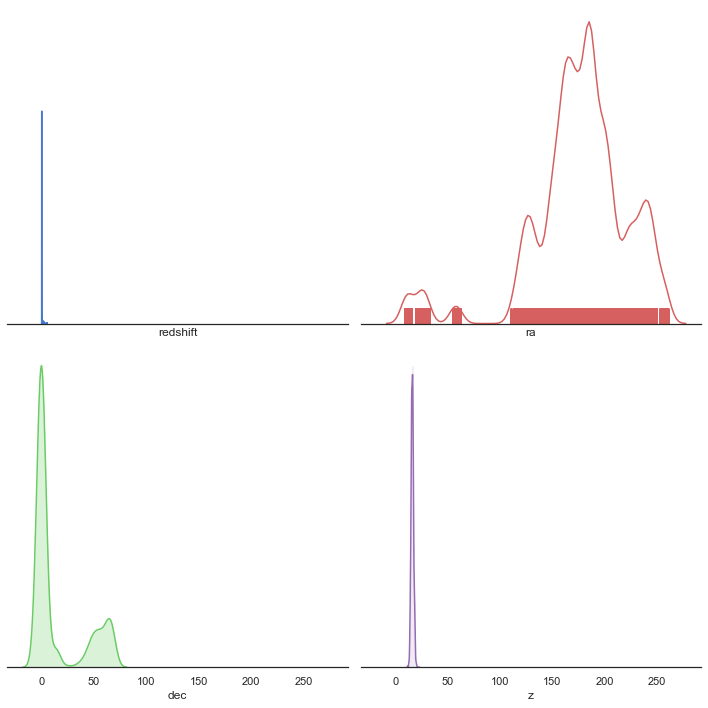

In [13]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

sns.distplot(X["redshift"],  color="b", ax=axes[0, 0])
sns.distplot(X["ra"], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(X["dec"], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(X["z"], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()
print("Vemos que tan concentrados estan los datos en busqueda de relaciones")

Jointplot de redshift y filtro Z


Text(336.9714285714286, 0.5, 'filtro Z')

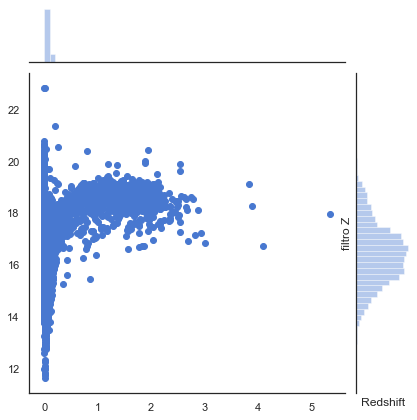

In [14]:
print("Jointplot de redshift y filtro Z")
sns.jointplot(X["redshift"].values, X["z"].values, data=X);
plt.xlabel("Redshift")
plt.ylabel("filtro Z")

Text(336.9714285714286, 0.5, 'dec')

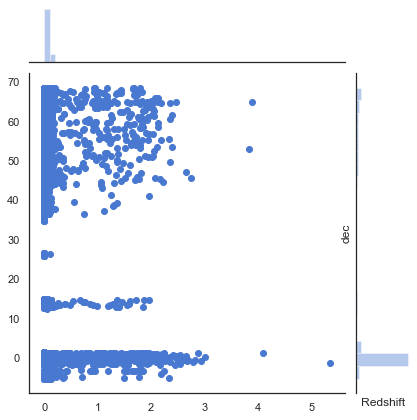

In [15]:
sns.jointplot(X["redshift"].values, X["dec"].values, data=X);
plt.xlabel("Redshift")
plt.ylabel("dec")
#candidato a arbol

Text(336.9714285714286, 0.5, 'Acension Recta')

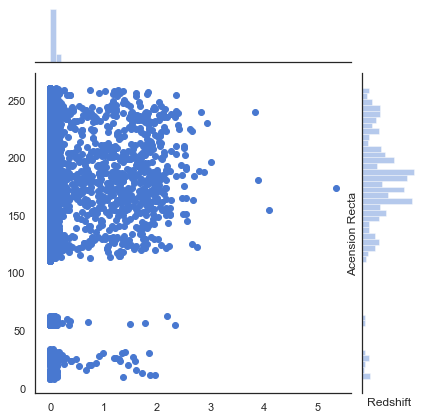

In [16]:
sns.jointplot(X["redshift"].values, X["ra"].values, data=X);
plt.xlabel("Redshift")
plt.ylabel("Acension Recta")

In [17]:
X.mean()

ra          175.529987
dec          14.836148
u            18.619355
g            17.371931
r            16.840963
i            16.583579
z            16.422833
redshift      0.143726
dtype: float64

In [18]:
'''fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def get_test_data():
    x1 =  (1/2)*sqrt(math.pow(Y-10,2)/3+Z)+10
    y1 = sqrt(math.pow(X-10,2)/3+X)+sqrt(math.pow(z-10,2)/2+X)
    X1, Y1 = np.meshgrid(x1,y1)
    Z1 = (1/2)*sqrt(math.pow(X1-10,2)/3-Y1)+10
    return X1,Y1,Z1

x2,y2,z2 = axes3d.get_test_data()
ax.plot_wireframe(x2,y2,z2, rstride=15, cstride=12)
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

plt.show()'''

"fig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\ndef get_test_data():\n    x1 =  (1/2)*sqrt(math.pow(Y-10,2)/3+Z)+10\n    y1 = sqrt(math.pow(X-10,2)/3+X)+sqrt(math.pow(z-10,2)/2+X)\n    X1, Y1 = np.meshgrid(x1,y1)\n    Z1 = (1/2)*sqrt(math.pow(X1-10,2)/3-Y1)+10\n    return X1,Y1,Z1\n\nx2,y2,z2 = axes3d.get_test_data()\nax.plot_wireframe(x2,y2,z2, rstride=15, cstride=12)\nax.set_xlabel('X ')\nax.set_ylabel('Y ')\nax.set_zlabel('Z ')\n\nplt.show()"

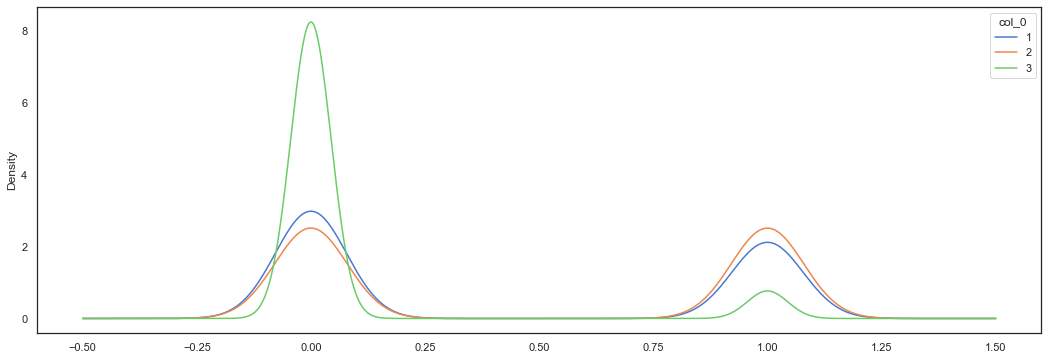

Text(0.5, 0, 'Ascension Recta')

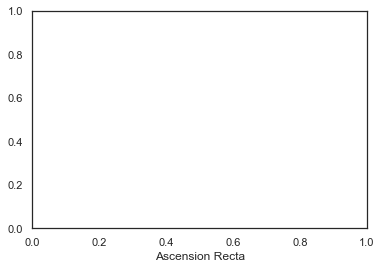

In [19]:
pd.crosstab(X["ra"].values,y["class"].values).plot(kind="density",figsize=(18,6))
plt.show()
plt.xlabel("Ascension Recta")

In [ ]:
data.plot(kind="scatter", x="ra", y = "dec")
print("Esto muestra las coordenadas Ecuatoriales")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Esto muestra las coordenadas Ecuatoriales


In [ ]:
c = 1+ np.log2(10000)
plt.hist(X["redshift"], bins=int(np.ceil(c))) #bins  = [0,30,60,...]
plt.xlabel("datos astronomicos")
plt.ylabel("Frecuencia")
plt.title("histograma de filtro Redshift ")

## Entrenamos el modelo 
### 3 metodos distintos los que mejor se consideren
* Random Forest
* SVM 
* regresion logistica multi class

In [ ]:
# Entrenamos el modelo.
X_train, X_test, y_train,y_test = train_test_split(X,y["class"],test_size=0.2)

In [ ]:
Image("n_estimador.png")

In [ ]:
#utilizamos random forest con n_estimators=8
model = RandomForestClassifier(n_estimators=8)
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
#estimador ideal
'''z = 250
c_optimo=[]
for i in range(1,z):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    c_optimo.append(model.score(X_test,y_test))
'''

In [ ]:
'''%matplotlib inline
plt.figure(figsize=(8,5))
plt.xlim(0,250)
plt.plot(c_optimo)
plt.xlabel("Iteraciones")
plt.ylabel("Score")
print("Porcentaje máximo en el indice: "+str(c_optimo.index(max(c_optimo))+1)+" con máximo puntaje: "+str(max(c_optimo)))
'''

In [ ]:
print("Reporte de rendimiento del modelo random forest: \n")
y_predicted = model.predict(X_test)
cm =confusion_matrix(y_test,y_predicted)
print(cm)
print(classification_report(y_test,y_predicted))

In [ ]:
'''%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('y predecida')
plt.ylabel("Verdadero")
'''

In [ ]:
X.columns.values

In [ ]:

features =['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']
# un extracto del arbol del modelo construido
tree_small = model.estimators_[3]
# guardamos el arbol en un png
export_graphviz(tree_small, out_file = 'small_tree.dot', 
                feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
Image("small_tree.png")

## Entrenamos un modelo con SVM 

In [ ]:
#Encontremos un C optimo y graficamos como se comporta al cambiar los estimadores
'''
yn=3
xn = X.shape[1]
z = yn*xn*10
c_optimo=[]
from sklearn.svm import SVC
for i in range(1,z):
    svmodel = SVC(C=i,gamma ='auto')
    svmodel.fit(X_train,y_train)
    c_optimo.append(svmodel.score(X_test,y_test))
'''


In [ ]:
'''
%matplotlib inline
plt.figure(figsize=(8,5))
plt.xlim(0,320)
plt.plot(c_optimo)
plt.xlabel("iteraciones")
plt.ylabel("Score")
print("porcentaje maximo en el indice: "+str(c_optimo.index(max(c_optimo)))+" con maximo puntaje: "+str(max(c_optimo)))
'''

In [ ]:
print("con C=62 nos da un buen Score")
Image("score_svc.png")

### Despues de la busqueda del mejor C, tenemos que C=62 es un buen Score.

In [ ]:
svmodel = SVC(C=62,gamma ='auto')
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

In [ ]:
y_predicted = svmodel.predict(X_test)

In [ ]:
# vemos el rendimiento con la matriz de confusion
svc_cm =confusion_matrix(y_test,y_predicted)
print(svc_cm)
print(classification_report(y_test,y_predicted))

In [ ]:
## Entrenamos los datos con un modelo de Regresion Logistica.

In [ ]:
Image("score_rl.png")

In [ ]:
'''z = 250
c_optimo=[]
for i in range(1,z):
    rl = LogisticRegression(C=i)
    rl.fit(X_train,y_train)
    c_optimo.append(rl.score(X_test,y_test))
'''

In [ ]:
'''%matplotlib inline
plt.figure(figsize=(8,5))
plt.xlim(0,320)
plt.plot(c_optimo)
plt.xlabel("Iteraciones")
plt.ylabel("Score")
print("Porcentaje máximo en el indice: "+str(c_optimo.index(max(c_optimo))+1)+" con máximo puntaje: "+str(max(c_optimo)))
'''

In [ ]:
## predecido el mejor C para el modelo c=191
rl = LogisticRegression(C=191)
rl.fit(X_train,y_train)
rl.score(X_test,y_test)

In [ ]:
y_predicted = rl.predict(X_test)
# vemos el rendimiento con la matriz de confusion
rl_cm =confusion_matrix(y_test,y_predicted)
print(rl_cm)
print(classification_report(y_test,y_predicted))

se puede concliur que que nuestro mejor modelo ha sido el de random forest ya que predice de manera mucho mas exacta 
que los otros modelos como SVM y Regresion logistica. Esto se debe por la naturaleza de los datos, nos conviene un bosque de arboles toman un mayor control sobre las decisiones.